In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath("../src"))

Loading BokehJS ...

c:\Users\idunn\OneDrive - NTNU\TDT4114\Mappe\src\temp_visualisering.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_df, x="tiår", y="gjennomsnitt", palette="Blues_d")


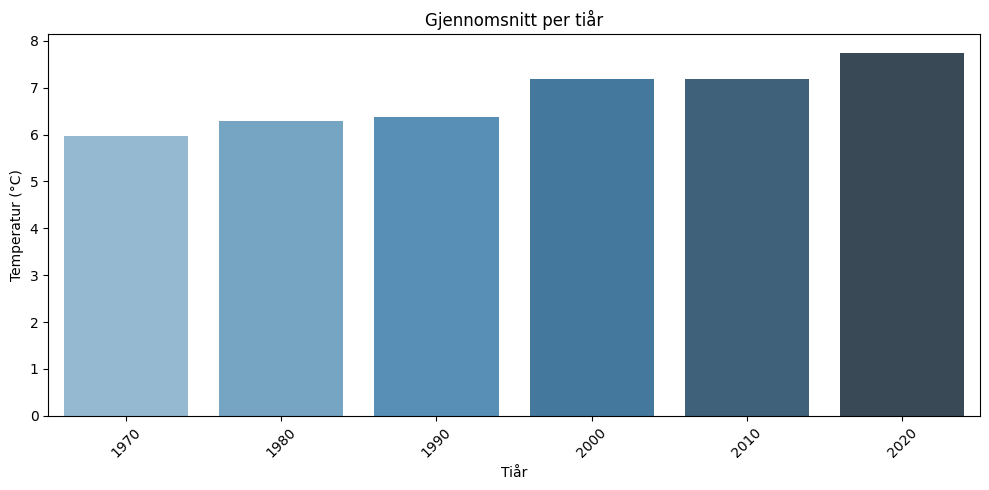

In [2]:
from temp_visualisering import load_and_compute, plot_interactive_bokeh, plot_by_decade

# 1) Last inn og beregn én gang
årlig_snitt, tiårs_snitt = load_and_compute("../data/temp_gloshaugen_historisk_renset_ 50.csv")

# 2) Kall den ene funksjonen du vil vise:
plot_interactive_bokeh(årlig_snitt)
plot_by_decade(tiårs_snitt)


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------


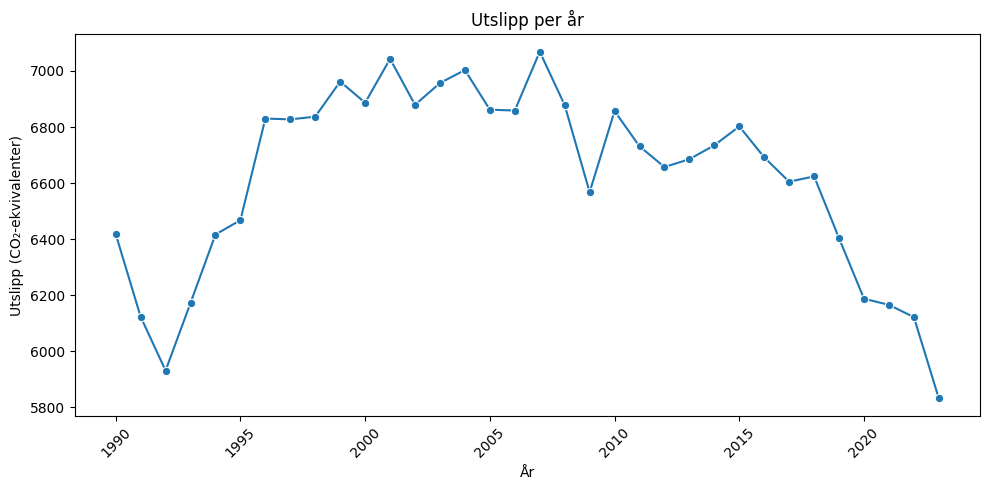

c:\Users\johan\Documents\Mappe\src\klimagass_visualisering.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=snitt, x="tiår", y=verdi_kolonne, palette="YlGnBu")


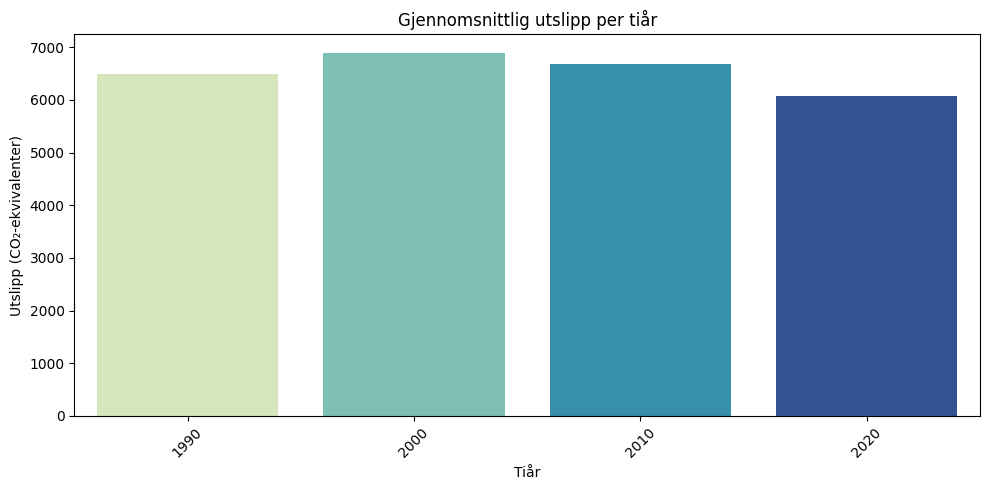

In [16]:
# Visualisering av klimagass-utslipp i Norge 
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(''), '..', 'src')))

from klimagass_visualisering import analyser_og_vis
analyser_og_vis("../data/klimagassutslipp_norge_renset.csv", datokolonne="år", groupby="år")



Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------

Analyse av:../data/klimagassutslipp_verden_renset.csv
-------------------------------------------------


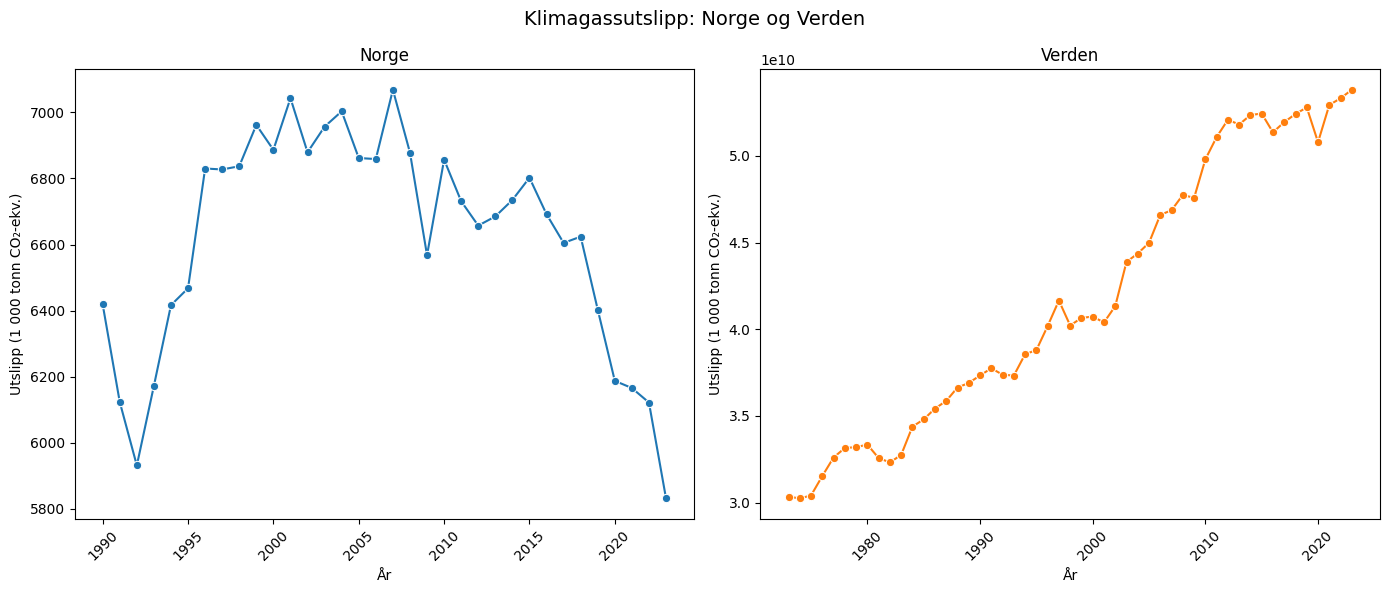

In [20]:
import importlib
import klimagass_visualisering
importlib.reload(klimagass_visualisering)

from klimagass_visualisering import sammenlign_norge_og_verden_separat
sammenlign_norge_og_verden_separat(
    "../data/klimagassutslipp_norge_renset.csv",
    "../data/klimagassutslipp_verden_renset.csv"
)

In [38]:
import importlib
import klimagass_visualisering
importlib.reload(klimagass_visualisering)


sammenlign_norge_og_verden_sammen(
    "../data/klimagassutslipp_norge_renset.csv",
    "../data/klimagassutslipp_verden_renset.csv"
)


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------

Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------


NameError: name 'sammenlign_norge_og_verden_sammen' is not defined


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------


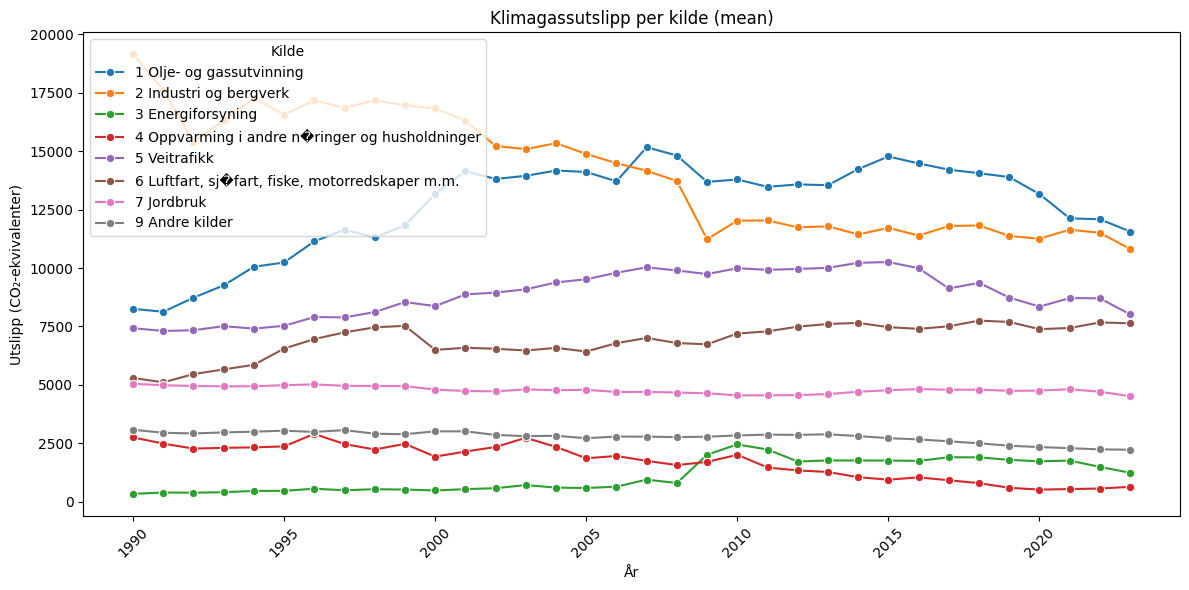

In [ ]:
import dataanalyse
import importlib
importlib.reload(dataanalyse)
statistikk, df_total, df = dataanalyse.analyser_fil("../data/klimagassutslipp_norge_renset.csv",sep=",",datokolonne="år",groupby="år")

from klimagass_visualisering import plott_utslipp_per_kilde_over_tid

kol_utslipp = [kol for kol in df.columns if "utslipp" in kol and "co2" in kol][0]
df[kol_utslipp] = pd.to_numeric(df[kol_utslipp], errors="coerce")
df = df[~df['kilde_(aktivitet)'].str.contains("alle kilder", case=False)]

stats_per_kilde_år = df.groupby(['kilde_(aktivitet)', 'år'])[kol_utslipp].agg(['mean', 'median']).reset_index()
stats_per_kilde_år = stats_per_kilde_år.round(2)

plott_utslipp_per_kilde_over_tid(stats_per_kilde_år, verdi_kolonne="mean")
